In [1]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.




=== Descriptive Statistics ===
         count         mean          std    min     25%      50%      75%  \
carat  53940.0     0.797940     0.474011    0.2    0.40     0.70     1.04   
depth  53940.0    61.749405     1.432621   43.0   61.00    61.80    62.50   
table  53940.0    57.457184     2.234491   43.0   56.00    57.00    59.00   
price  53940.0  3932.799722  3989.439738  326.0  950.00  2401.00  5324.25   
x      53940.0     5.731157     1.121761    0.0    4.71     5.70     6.54   
y      53940.0     5.734526     1.142135    0.0    4.72     5.71     6.54   
z      53940.0     3.538734     0.705699    0.0    2.91     3.53     4.04   

            max  
carat      5.01  
depth     79.00  
table     95.00  
price  18823.00  
x         10.74  
y         58.90  
z         31.80  

=== Missing Values ===
carat    0
depth    0
table    0
price    0
x        0
y        0
z        0
dtype: int64


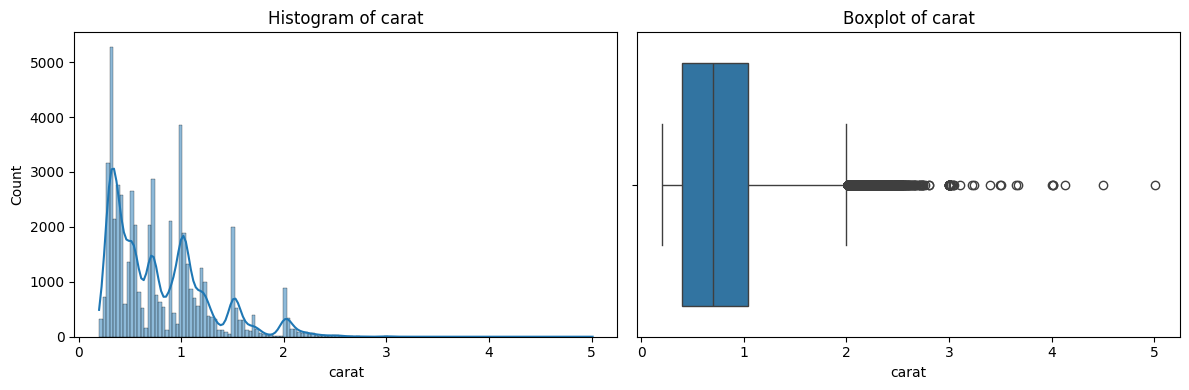

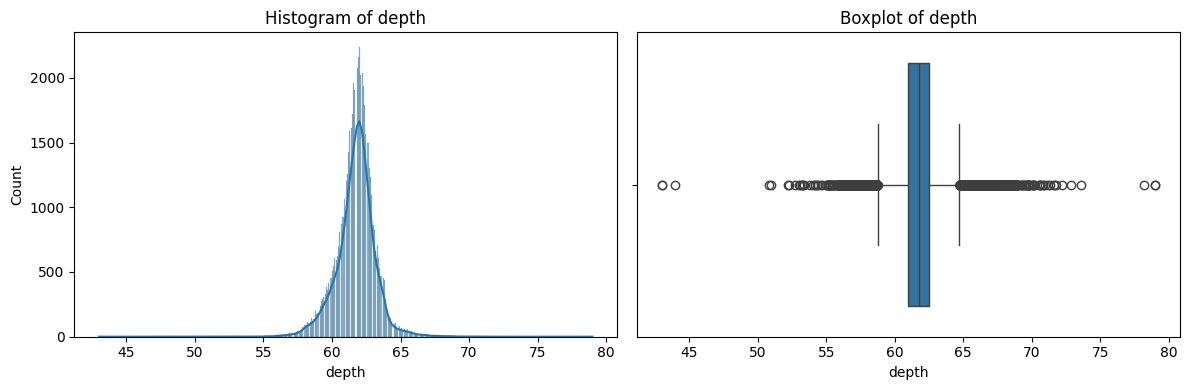

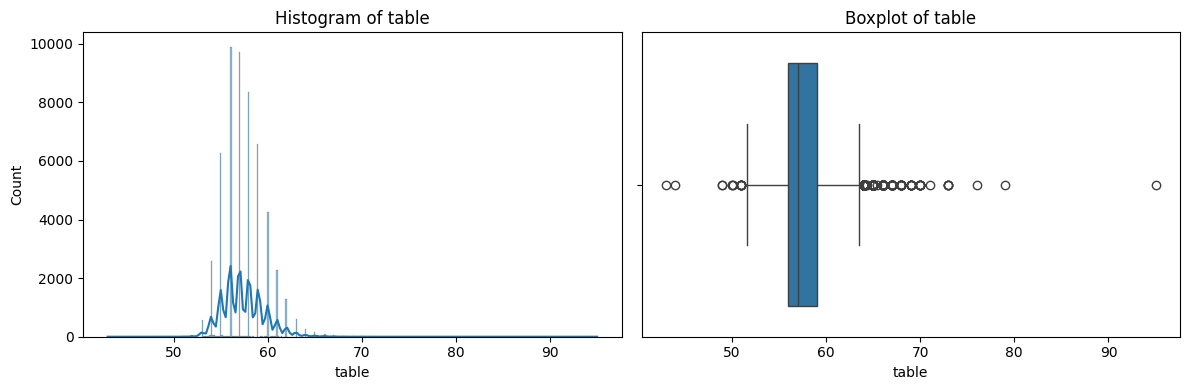

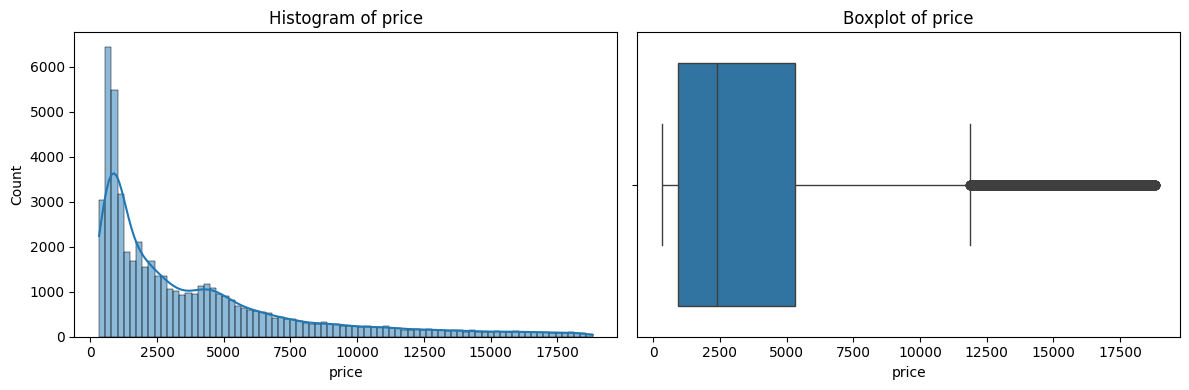

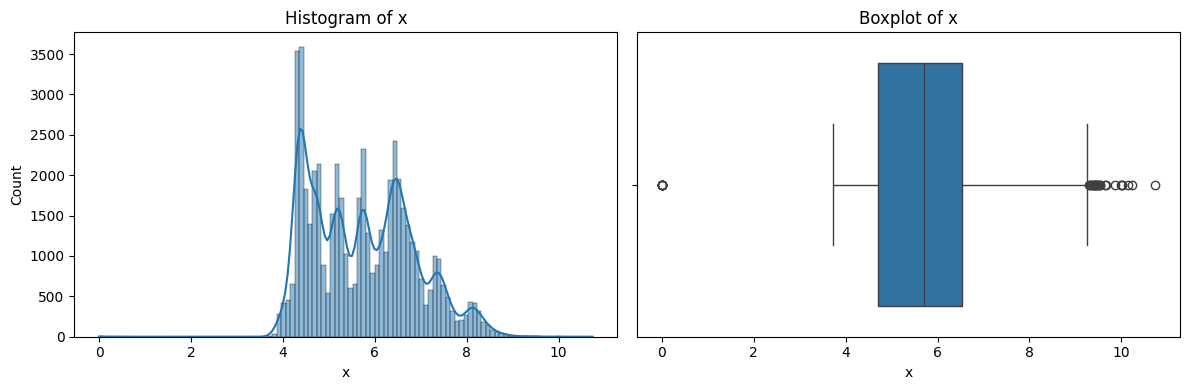

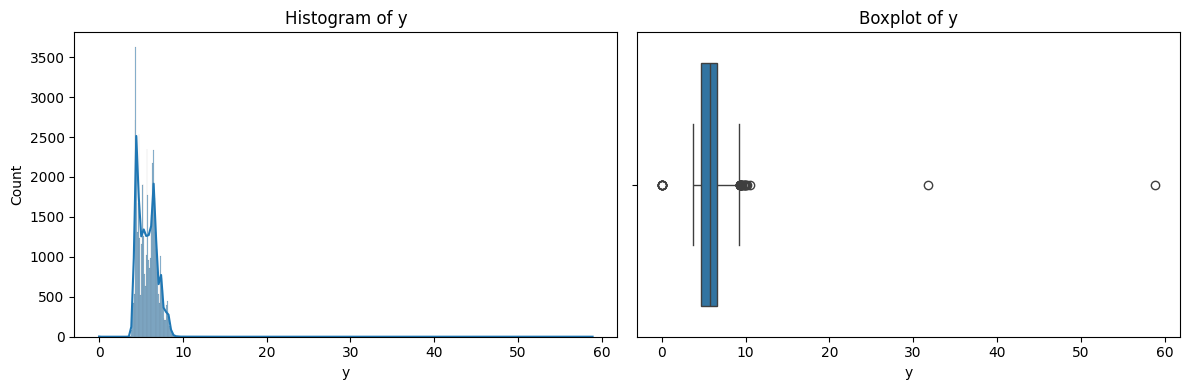

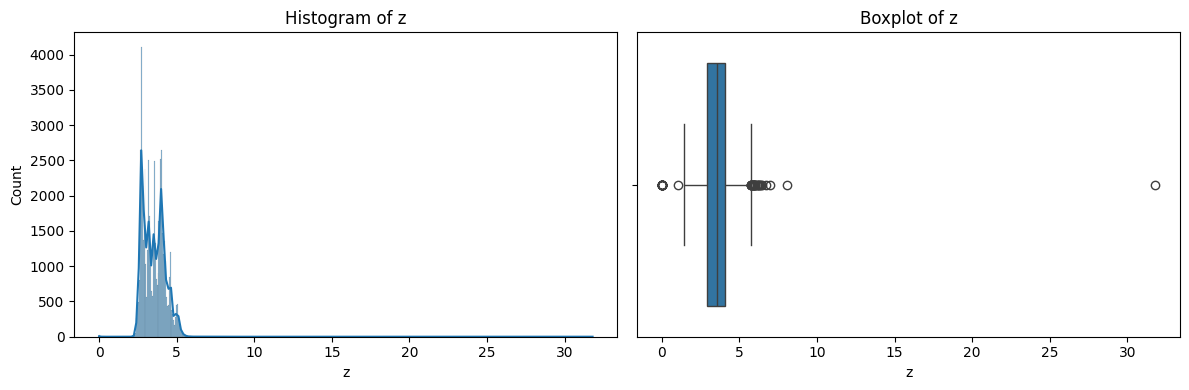


=== Outlier Detection (IQR Method) ===
carat: 1889 outliers (3.50%)
depth: 2545 outliers (4.72%)
table: 605 outliers (1.12%)
price: 3540 outliers (6.56%)
x: 32 outliers (0.06%)
y: 29 outliers (0.05%)
z: 49 outliers (0.09%)

=== Outlier Detection (Z-Score Method) ===
carat: 439 outliers (Z > 3)
depth: 685 outliers (Z > 3)
table: 336 outliers (Z > 3)
price: 1206 outliers (Z > 3)
x: 43 outliers (Z > 3)
y: 34 outliers (Z > 3)
z: 55 outliers (Z > 3)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load sample dataset
df = sns.load_dataset('diamonds')  # Replace with your own dataset if needed

# Keep only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# --------------------------------------------
# 1. Descriptive Statistics
# --------------------------------------------
print("=== Descriptive Statistics ===")
print(df[numeric_cols].describe().T)

# --------------------------------------------
# 2. Missing Value Analysis
# --------------------------------------------
print("\n=== Missing Values ===")
print(df[numeric_cols].isnull().sum())

# --------------------------------------------
# 3. Distribution and Boxplots
# --------------------------------------------
for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# --------------------------------------------
# 4. Outlier Detection - IQR Method
# --------------------------------------------
print("\n=== Outlier Detection (IQR Method) ===")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    outlier_pct = 100 * len(outliers) / len(df)
    print(f"{col}: {len(outliers)} outliers ({outlier_pct:.2f}%)")

# --------------------------------------------
# 5. Outlier Detection - Z-Score Method
# --------------------------------------------
print("\n=== Outlier Detection (Z-Score Method) ===")
z_threshold = 3
z_scores = np.abs(stats.zscore(df[numeric_cols].dropna()))
outliers_z = (z_scores > z_threshold).sum(axis=0)

for i, col in enumerate(numeric_cols):
    print(f"{col}: {outliers_z[i]} outliers (Z > {z_threshold})")
